In [7]:
import itertools

# =========================
# Voorbeeld in F_5 (mod 5)
# =========================
p = 5
F = list(range(p))

def add(a, b):   # optellen in F_p
    return (a + b) % p

def mul(a, b):   # vermenigvuldigen in F_p
    return (a * b) % p

def neg(a):      # -a in F_p
    return (-a) % p

print("In F_5 geldt 1+1+1+1+1 =", (1+1+1+1+1) % p, "(dus karakteristiek 5)")

# ==========================================
# (1) 'Standaard' dot product faalt positief
# ==========================================
def dot(v, w):
    # <(x1,x2),(y1,y2)> = x1*y1 + x2*y2  (mod p)
    return (v[0]*w[0] + v[1]*w[1]) % p

v = (1, 2)
print("v =", v, "is niet nul, maar <v,v> =", dot(v, v), "in F_5")

# Zoek nog meer niet-nul vectoren met <v,v>=0
isotropic = []
for x in F:
    for y in F:
        if (x, y) != (0, 0) and dot((x, y), (x, y)) == 0:
            isotropic.append((x, y))
print("Niet-nul v met <v,v>=0 in F_5^2:", isotropic)

# =====================================================
# (2) Brute force: bestaat er een 'orde' die werkt?
#     (zoals een geordend veld: 0<1, + en * compatibel)
# =====================================================
def order_works(perm):
    # perm = elementen in stijgende volgorde (totale orde)
    rank = {a: i for i, a in enumerate(perm)}
    lt = lambda a, b: rank[a] < rank[b]

    # Axioma: 0 < 1
    if not lt(0, 1):
        return False

    # Compatibel met optellen: a<b => a+c < b+c (voor alle c)
    for a in F:
        for b in F:
            if lt(a, b):
                for c in F:
                    if not lt(add(a, c), add(b, c)):
                        return False

    # Positief gesloten onder vermenigvuldiging: a>0,b>0 => ab>0
    pos = [a for a in F if lt(0, a)]
    pos_set = set(pos)
    for a in pos:
        for b in pos:
            if mul(a, b) not in pos_set:
                return False

    return True

found = None
for perm in itertools.permutations(F):
    if order_works(perm):
        found = perm
        break

print("Bestaat er een geordende-veld-orde op F_5?", found is not None)
if found:
    print("Voorbeeld-orde:", found)
else:
    print("Geen enkele totale orde op {0,1,2,3,4} werkt met mod-5 optellen/vermenigvuldigen.")


In F_5 geldt 1+1+1+1+1 = 0 (dus karakteristiek 5)
v = (1, 2) is niet nul, maar <v,v> = 0 in F_5
Niet-nul v met <v,v>=0 in F_5^2: [(1, 2), (1, 3), (2, 1), (2, 4), (3, 1), (3, 4), (4, 2), (4, 3)]
Bestaat er een geordende-veld-orde op F_5? False
Geen enkele totale orde op {0,1,2,3,4} werkt met mod-5 optellen/vermenigvuldigen.


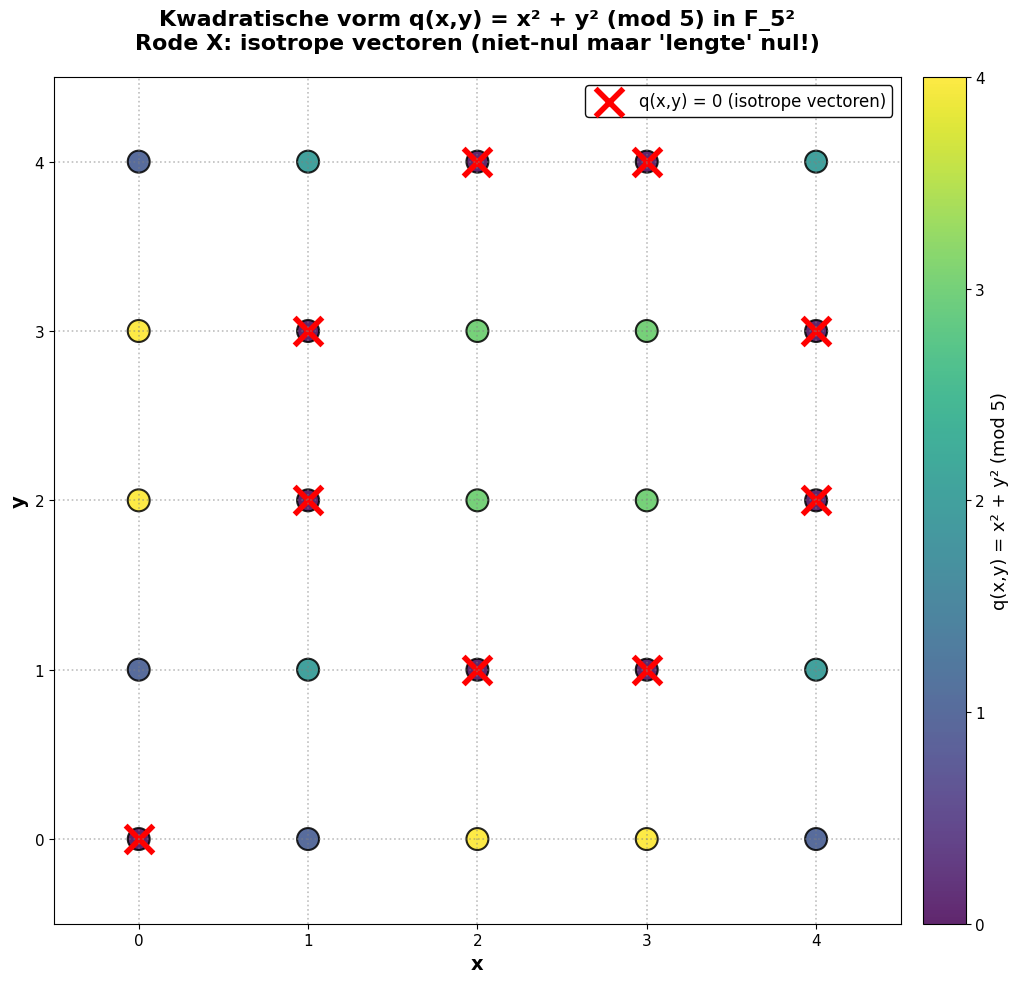


F_5²: Niet-nul punten met q(x,y) = 0:
  (2, 1)
  (3, 1)
  (1, 2)
  (4, 2)
  (1, 3)
  (4, 3)
  (2, 4)
  (3, 4)



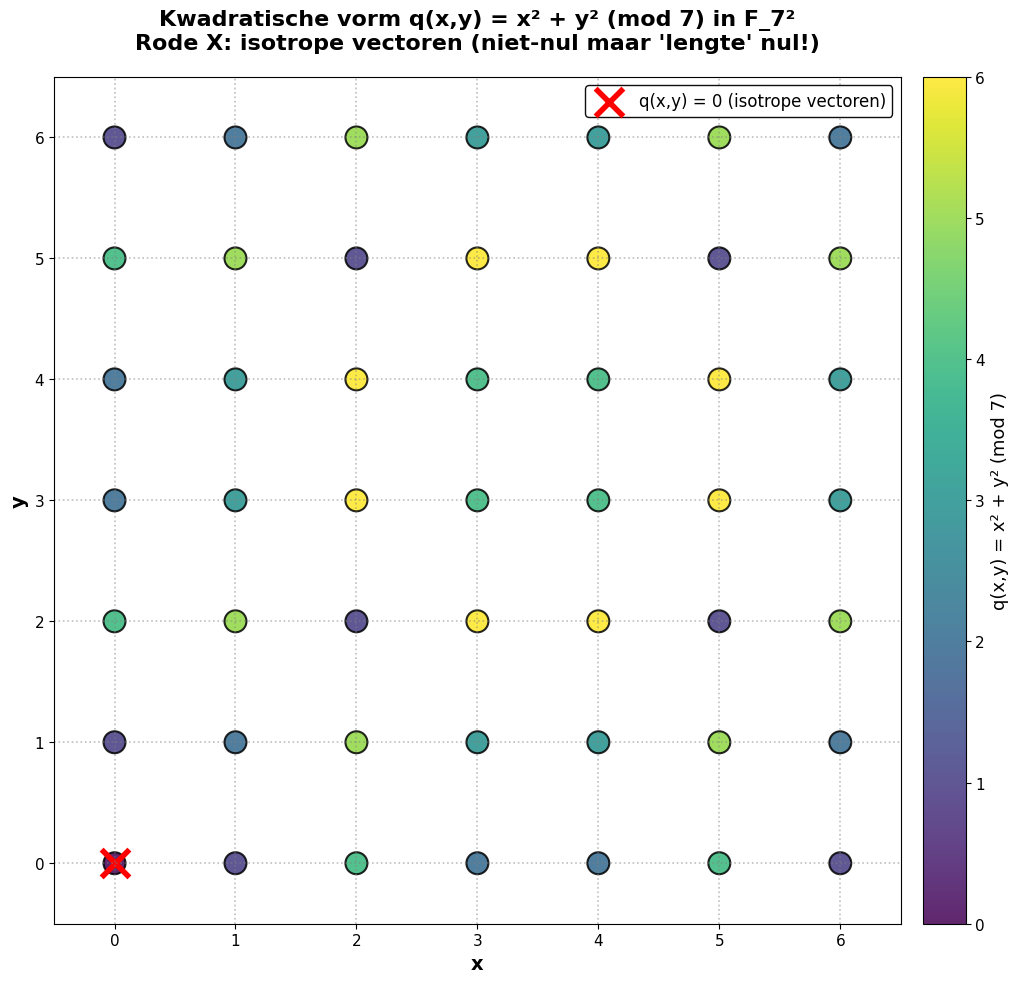


F_7²: Niet-nul punten met q(x,y) = 0:



In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Verhoog standaard figuurgrootte en fontgrootte
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['legend.fontsize'] = 12

def plot_fp_quadratic_form(p=5):
    """
    Visualiseer in F_p^2 (punten (x,y) met x,y in {0,...,p-1})
    de kwadratische vorm q(x,y)=x^2+y^2 (mod p).

    - kleur = waarde van q(x,y) in {0,...,p-1}
    - grote 'x' = punten met q(x,y)=0 (dus "nul-lengte" voor <v,v>=x^2+y^2 mod p)
    """
    xs, ys = np.meshgrid(np.arange(p), np.arange(p))
    x = xs.ravel()
    y = ys.ravel()

    q = (x*x + y*y) % p  # q(x,y)=x^2+y^2 mod p

    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Gebruik een duidelijke colormap (viridis is goed voor discrete waarden)
    sc = ax.scatter(x, y, c=q, s=250, cmap='viridis', edgecolors='black', 
                    linewidths=1.5, alpha=0.85)
    
    cbar = plt.colorbar(sc, ax=ax, label=f"q(x,y) = x² + y² (mod {p})", 
                        ticks=range(p), pad=0.02)
    cbar.ax.tick_params(labelsize=11)

    # Highlight q=0 points (nul-lengte) met opvallende rode X markers
    mask0 = (q == 0)
    ax.scatter(x[mask0], y[mask0], marker="x", s=400, c='red', 
              linewidths=4, label=f'q(x,y) = 0 (isotrope vectoren)')

    # Labels & layout
    ax.set_title(f"Kwadratische vorm q(x,y) = x² + y² (mod {p}) in F_{p}²\n" + 
                 "Rode X: isotrope vectoren (niet-nul maar 'lengte' nul!)", 
                 fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel("x", fontsize=14, fontweight='bold')
    ax.set_ylabel("y", fontsize=14, fontweight='bold')
    ax.set_xticks(range(p))
    ax.set_yticks(range(p))
    ax.tick_params(axis='both', labelsize=11)
    ax.set_aspect("equal", adjustable="box")
    ax.grid(True, linestyle=":", linewidth=1.2, alpha=0.5, color='gray')
    ax.legend(loc='upper right', fontsize=12, framealpha=0.95, 
              edgecolor='black', fancybox=True)
    
    # Voeg minor grid toe voor betere leesbaarheid
    ax.set_xlim(-0.5, p-0.5)
    ax.set_ylim(-0.5, p-0.5)
    
    plt.tight_layout()
    plt.show()

    # Print ook expliciet welke niet-nul punten q=0 hebben
    zero_points = [(int(xi), int(yi)) for xi, yi, qi in zip(x, y, q) 
                   if qi == 0 and not (xi == 0 and yi == 0)]
    print(f"\n{'='*60}")
    print(f"F_{p}²: Niet-nul punten met q(x,y) = 0:")
    print(f"{'='*60}")
    for pt in zero_points:
        print(f"  ({pt[0]}, {pt[1]})")
    print(f"{'='*60}\n")

# ---- run ----
plot_fp_quadratic_form(5)
plot_fp_quadratic_form(7)
